<a href="https://colab.research.google.com/github/Abhinavpanjiyar1/Pytorch/blob/main/Linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [33]:
from sklearn.datasets import load_breast_cancer

In [34]:
# load the data
data = load_breast_cancer()

In [35]:
# check the type of data
type(data)

sklearn.utils._bunch.Bunch

In [36]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
data.data.shape

(569, 30)

In [38]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [39]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [40]:
data.target.shape

(569,)

In [41]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=1)
N, D =X_train.shape

In [43]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#BUILD THE MODEL

In [44]:
model = nn.Sequential(nn.Linear(D,1),
                      nn.Sigmoid()
                      )

In [45]:
# loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())


In [46]:
# convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train =torch.from_numpy(y_train.astype(np.float32)).reshape(-1,1)
y_test = torch.from_numpy(y_test.astype(np.float32)).reshape(-1, 1)


#TRAIN THE MODEL

In [47]:
n_epochs = 1000

#stuff to store
train_losses =np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range (n_epochs):
  optimizer.zero_grad()

  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  loss.backward()
  optimizer.step()

  #get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)


  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if(it+1) % 50 == 0:
    print(f'Epoch: {it +1}/ {n_epochs} , Train_loss: {loss.item():.4f}, Test_loss: {loss_test.item():.4f}')


Epoch: 50/ 1000 , Train_loss: 0.4116, Test_loss: 0.1682
Epoch: 100/ 1000 , Train_loss: 0.3084, Test_loss: 0.1055
Epoch: 150/ 1000 , Train_loss: 0.2490, Test_loss: 0.0715
Epoch: 200/ 1000 , Train_loss: 0.2113, Test_loss: 0.0501
Epoch: 250/ 1000 , Train_loss: 0.1856, Test_loss: 0.0359
Epoch: 300/ 1000 , Train_loss: 0.1669, Test_loss: 0.0263
Epoch: 350/ 1000 , Train_loss: 0.1528, Test_loss: 0.0197
Epoch: 400/ 1000 , Train_loss: 0.1417, Test_loss: 0.0150
Epoch: 450/ 1000 , Train_loss: 0.1327, Test_loss: 0.0116
Epoch: 500/ 1000 , Train_loss: 0.1253, Test_loss: 0.0091
Epoch: 550/ 1000 , Train_loss: 0.1190, Test_loss: 0.0072
Epoch: 600/ 1000 , Train_loss: 0.1137, Test_loss: 0.0058
Epoch: 650/ 1000 , Train_loss: 0.1091, Test_loss: 0.0047
Epoch: 700/ 1000 , Train_loss: 0.1051, Test_loss: 0.0039
Epoch: 750/ 1000 , Train_loss: 0.1015, Test_loss: 0.0032
Epoch: 800/ 1000 , Train_loss: 0.0983, Test_loss: 0.0027
Epoch: 850/ 1000 , Train_loss: 0.0955, Test_loss: 0.0022
Epoch: 900/ 1000 , Train_loss: 0

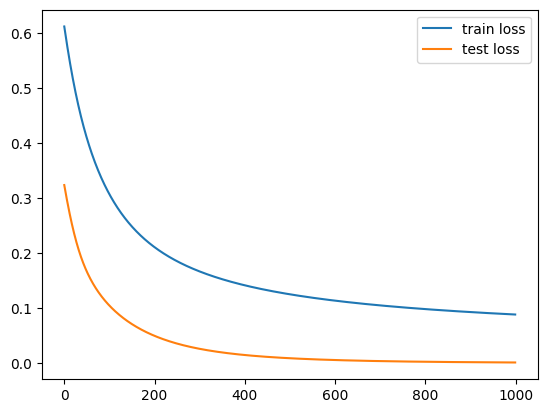

In [48]:
# plot the train and test loss per iteration
plt.plot(train_losses , label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()


In [51]:
# get accuracy

with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc =np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc}:.4f')



Train acc: 0.9842, Test acc: 1.0:.4f


#save and load the model

In [52]:
model.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.2412, -0.4637, -0.2934, -0.3055, -0.2868, -0.3150, -0.3903, -0.2909,
                       -0.1046,  0.5867, -0.3845,  0.1183, -0.3183, -0.5754, -0.1061,  0.3831,
                        0.1620, -0.3153,  0.1600,  0.2816, -0.4324, -0.5819, -0.3197, -0.5408,
                       -0.2216, -0.1525, -0.4962, -0.4003, -0.4680, -0.2710]])),
             ('0.bias', tensor([0.4989]))])

In [53]:
torch.save(model.state_dict(), 'mymodel.pt')

In [54]:
!ls

mymodel.pt  sample_data


In [56]:
#load the data
model2 = nn.Sequential(nn.Linear(D, 1),
                       nn.Sigmoid()
                       )

model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [58]:
# evaluate the new model

with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc =np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc}:.4f')

Train acc: 0.9842, Test acc: 1.0:.4f


In [59]:
# download the model
from google.colab import files
files.download('mymodel.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>